# **2.1 Fourier Series Approximation**

Q1

In [61]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal

# Square pulse
def square(t):
  if t % 1 < 0.25 or t % 1 > 0.75:
    s = 1
  elif t % 1 == 0.25 or t % 1 == 0.75:
    s = 0.5
  else:
    s = 0
  return s
# Fourier series coefficients
def a(k):
  # Your code goes here
  if k==0 :
    a_k = 1/2
  else:
    a_k = np.sin(k*np.pi/2)/(k*np.pi)
  return a_k



Q2

In [62]:
def fs_approx(t, N):
  x_t = 0
  # Your code goes here
  for i in range(-N,N+1):
    x_t= a(i)*np.exp(1j*i*2*np.pi*t) + x_t
  return x_t



Q3

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


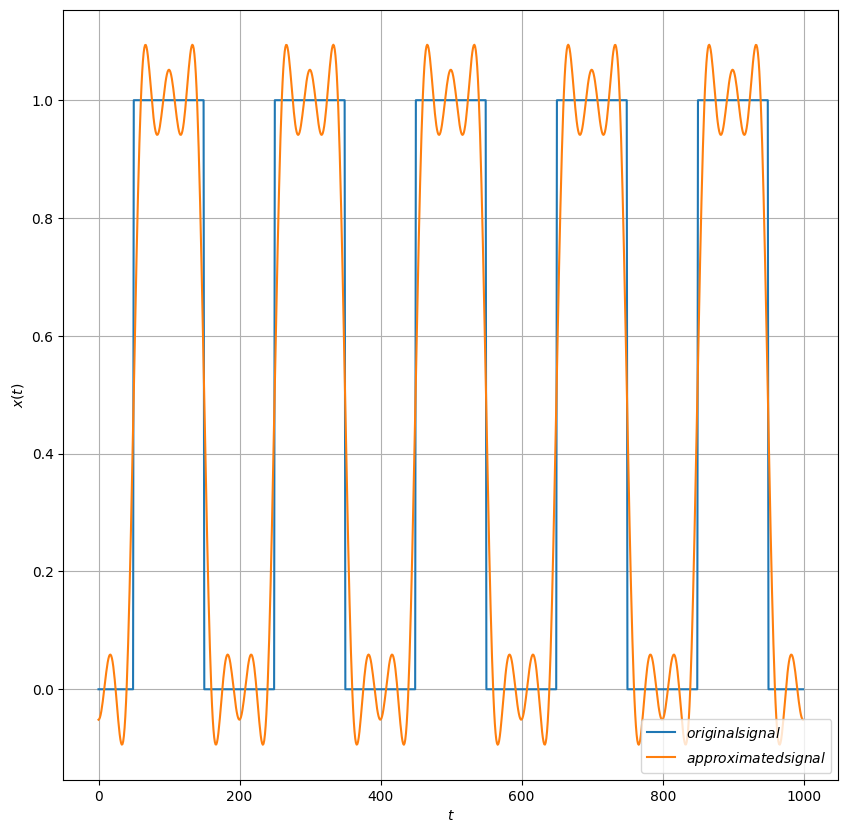

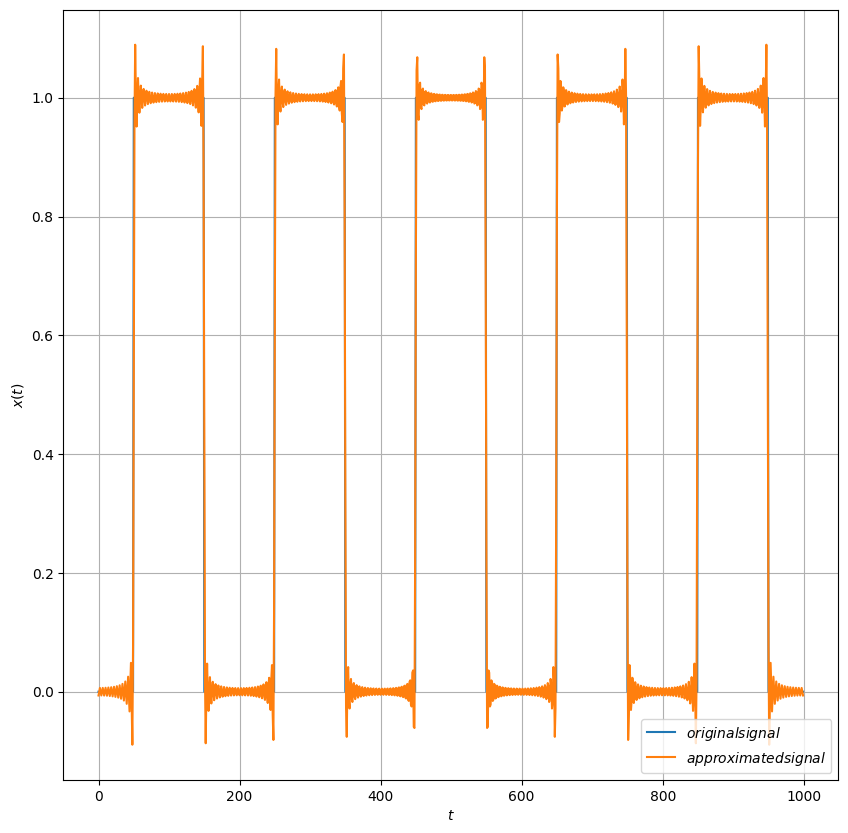

In [63]:
# Fourier series approximation of the square wave
x = []
y = []
N = 5 # CHANGE HERE
time = np.linspace(-2.5,2.5,1000) # Your code goes here
for t in time:
  # Your code goes here
  x.append(square(t))
  y.append(fs_approx(t,N))

fig, axes = plt.subplots(1,1, figsize=(10,10))
axes.plot(x, label='$original signal$')
axes.set_xlabel('$t$')
axes.set_ylabel('$x(t)$')
axes.grid(True)
axes.plot(y, label='$approximated signal$')
axes.set_xlabel('$t$')
axes.set_ylabel('$x(t)$')
plt.legend(loc='lower right')
axes.grid(True)
plt.show()

# Fourier series approximation of the square wave
x = []
y = []
N = 50 # CHANGE HERE
time = np.linspace(-2.5,2.5,1000) # Your code goes here
for t in time:
  # Your code goes here
  x.append(square(t))
  y.append(fs_approx(t,N))

fig, axes = plt.subplots(1,1, figsize=(10,10))
axes.plot(x, label='$original signal$')
axes.set_xlabel('$t$')
axes.set_ylabel('$x(t)$')
axes.grid(True)
axes.plot(y, label='$approximated signal$')
axes.set_xlabel('$t$')
axes.set_ylabel('$x(t)$')
plt.legend(loc='lower right')
axes.grid(True)
plt.show()



Q : when N increases, approximated signal gets similar to the original signal

# **2.2 Fourier Series Coefficients**

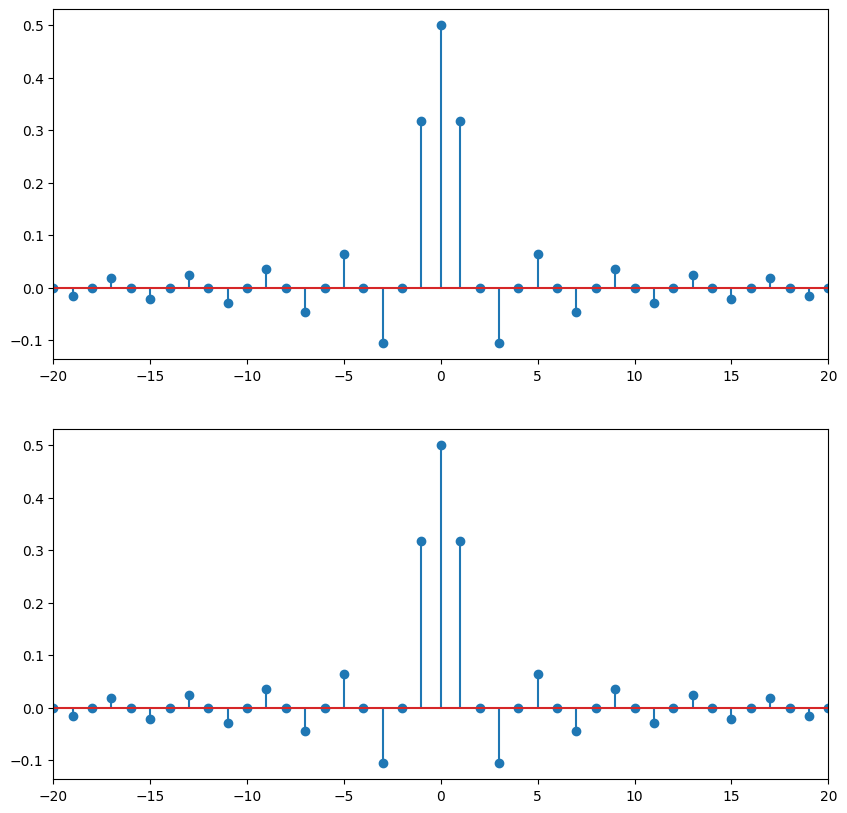

In [64]:
N = 200
t = np.linspace(0, 1-1/N, N)
x = []
for i in t:
  x.append(square(i))
# Obtaining FFT coefficients
X = fftshift(fft(x))
X_norm = X.real/N
Arr_k = np.linspace(-N/2, N/2-1, N)
# plotting fft coefficients
# Your code goes here
N = 200
t = np.linspace(0, 1-1/N, N)
x = []
for i in t:
    x.append(square(i))
# Obtaining FFT coefficients
X = fftshift(fft(x))
X_norm = X.real/N
k = np.linspace(-N/2, N/2-1, N)
# plotting fft coefficients
# Your code goes here
ak = []
for i in k:
    ak.append(a(i))

fig, axes = plt.subplots(2,1, figsize=(10,10))
axes[0].stem(k,ak)
axes[1].stem(k,X_norm)
axes[0].set_xlim(-20,20)
axes[1].set_xlim(-20,20)
plt.show()

Q : ak and the X_norm are the same

# **2.3 Ideal Filters and Actual Filters**

Q

In [65]:
# Creating 3 sinusoidal signals
# Your code goes here
w1 = 100*np.pi
w2 = 400*np.pi
w3 = 800*np.pi
a1 = 0.75
a2 = 1
a3 = 0.5
fs = 4095
ws = 2*np.pi*fs
def x(t):
# Your code goes here
  x_t = a1*np.sin(w1*t) + a2*np.sin(w2*t) + a3*np.sin(w3*t)
  return x_t


Q

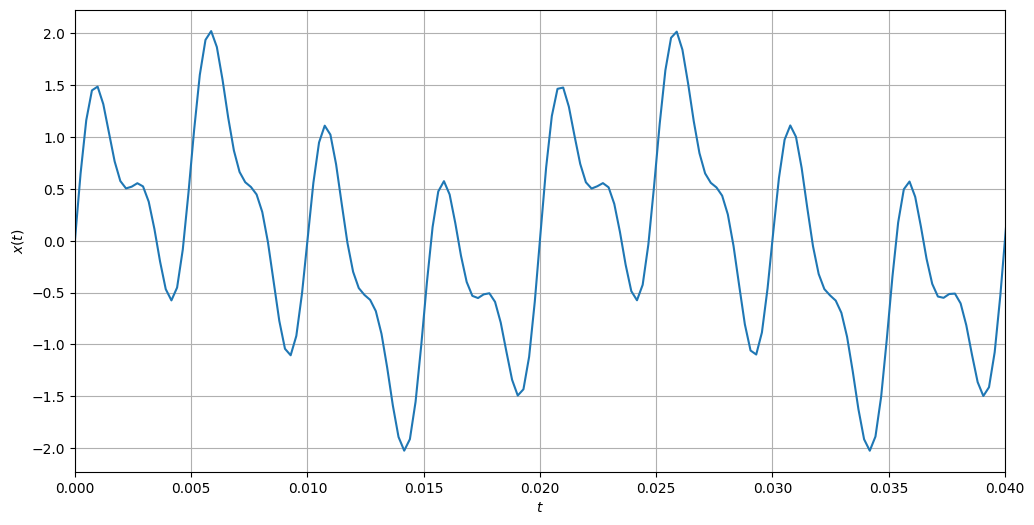

In [66]:
time = np.linspace(0,1,fs+1)
xt = [x(t_) for t_ in time]
# Plotting the input signal in time domain
# our code goes here
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(time,xt)
ax.set_xlim(0,0.04)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.grid(True)
plt.show()

Q

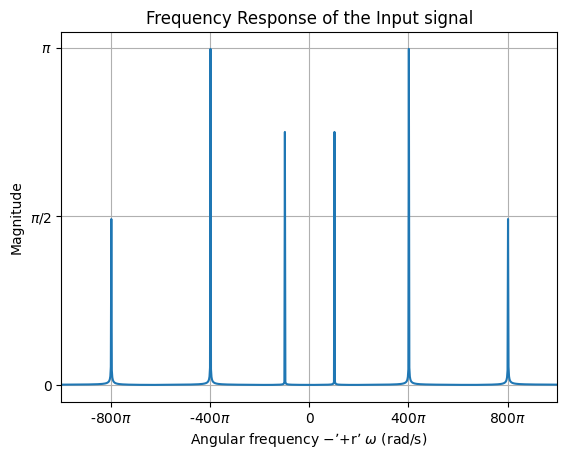

In [67]:
Xw = fft(xt, 4096)*2*np.pi/fs
Xw = fftshift(Xw)
k = np.arange(1,4097)
w = k/4096*ws - ws/2
# Plotting the input signal in frequency domain
fig, ax = plt.subplots()
# Your code goes here
ax.plot(w,abs(Xw))


ax.set_title('Frequency Response of the Input signal')
ax.set_xlabel('Angular frequency −’+r’ $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')
ax.set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,400*np.pi))
ax.set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,400)])
ax.set_xlim(-1000*np.pi, 1000*np.pi)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
plt.grid()

Q

In [68]:
# Ideal filter
wc1 = (w1+w2)/2
wc2 = (w2+w3)/2
def ideal_filter(w):
  # Your code goes here
  gain=0
  if (abs(w) <= wc2) and (abs(w) >= wc1):
    gain =1
  else:
    gain =0
  return gain



2.3.1 Ideal Filter: Part A

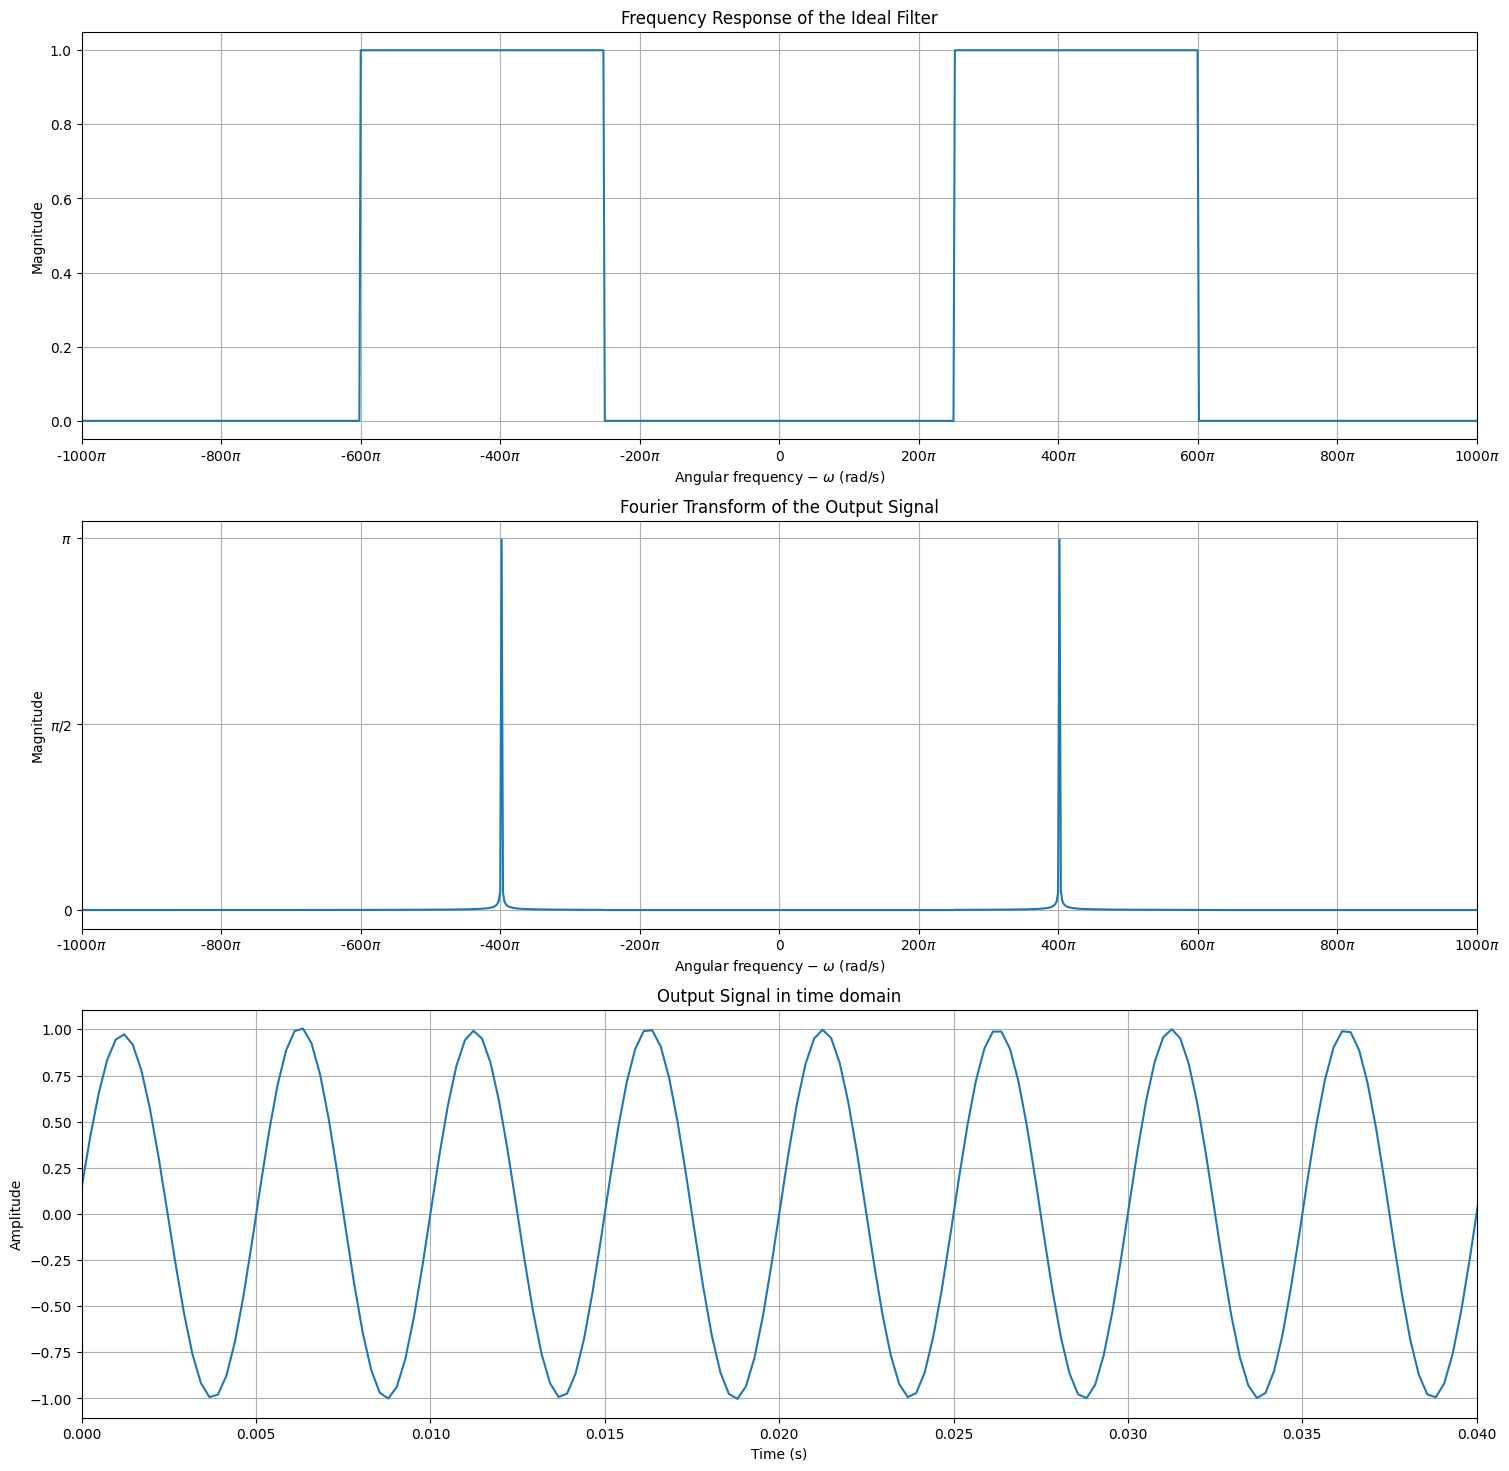

In [69]:
k = np.arange(1,4097)
w = k/4096*ws - ws/2
# Your code goes here
H0w =  [ideal_filter(w_) for w_ in w]
# Simulation of Filtering
Y0w = np.multiply(Xw,H0w)
# Obtaining the time domain signal
y0t = ifft(fftshift(Y0w*fs/(2*np.pi)))
# Ideal filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(w,H0w)
axes[0].set_title('Frequency Response of the Ideal Filter')
axes[0].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()
# Frequency response of the ideal filter output (magnitude)
axes[1].plot(w,abs(Y0w))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()
# Output signal in time domain
axes[2].plot(time,np.real(y0t))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

2.3.2 Ideal Filter: Part B


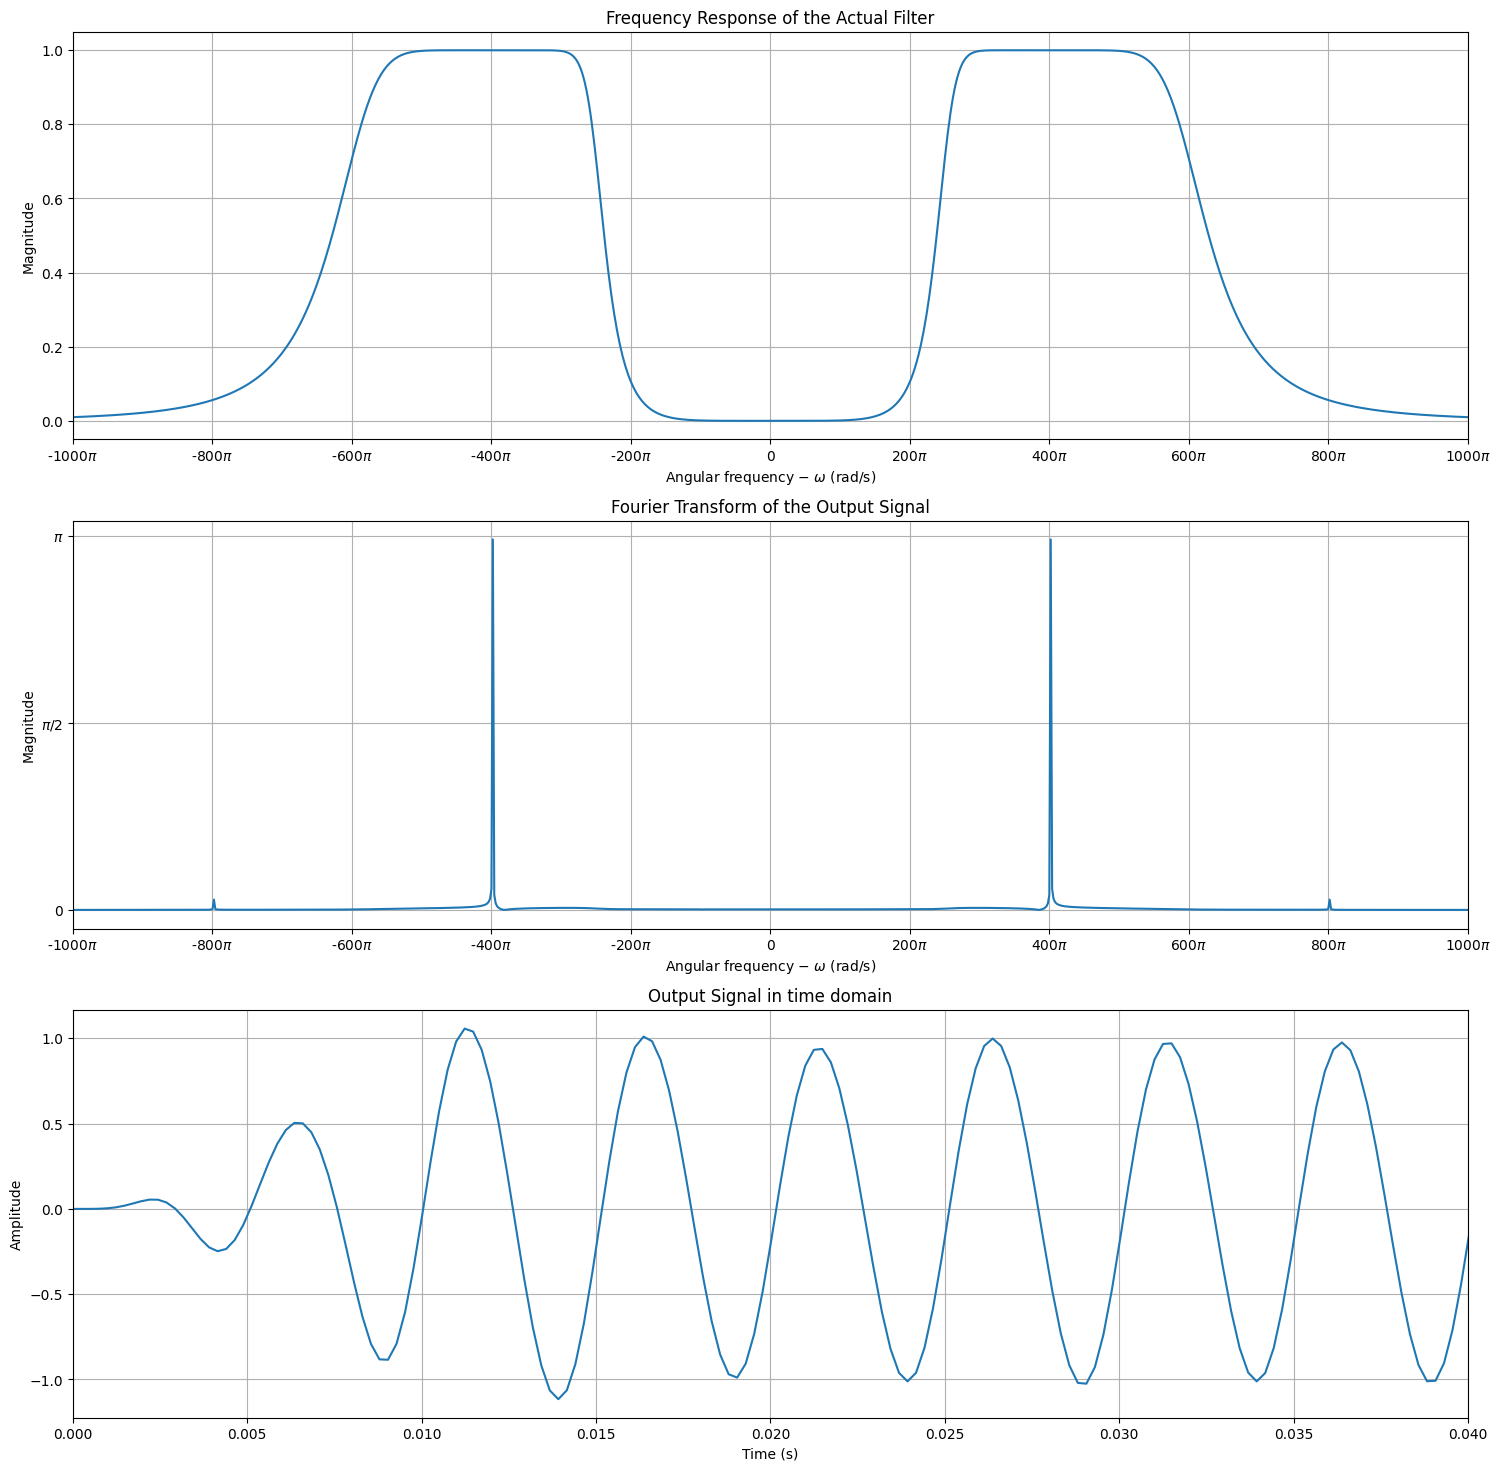

In [70]:
# Actual Filter
b, a = signal.butter(5, [2*wc1/ws, 2*wc2/ws], 'bandpass', analog=False)
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)*ws/(2*np.pi)
h = np.append(np.flipud(h), h)
# Filtering
y = signal.lfilter(b,a,xt)
# Obtaining the frequency response of the output signal
Y = fft(y,4096)*2*np.pi/fs
Y = fftshift(Y)

# Actual filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(ww, abs(h) )
axes[0].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Frequency Response of the Actual Filter')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()
# Frequency response of the actual filter output (magnitude)
axes[1].plot(w,abs(Y))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()
# # Output signal in time domain
axes[2].plot(time,np.real(y))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

Q : comment on Part A and PartB :-
Actual filters have transition periods but ideal filters don't. in the beginning output signal of the actual filter takes sometime to become steady.

#**2.4 Removing Power Line Noise in an ECG Signal**

Task 1

In [71]:
# Reading the ECG data
ecg = []
# EDIT HERE
ecg = np.loadtxt("ecg_signal.csv")
duration = 10 # seconds
T = duration/len(ecg)
Fs = 1/T
# Obtaining the fourier transform
F = fftshift(fft(ecg))
fr = np.linspace(-Fs/2, Fs/2, len(F))



Task 2

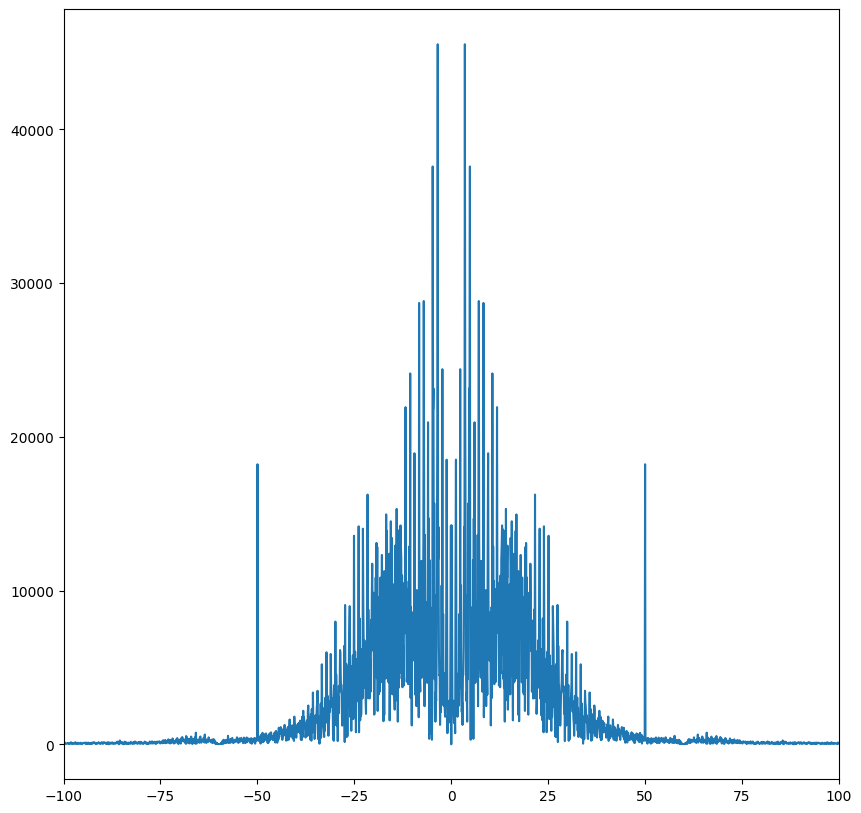

In [72]:
fig, axes = plt.subplots(1,1, figsize=(10,10))
axes.plot(fr,abs(F))
axes.set_xlim(-100,100)
plt.show()

Task 3 : Band-stop filter

Task 4

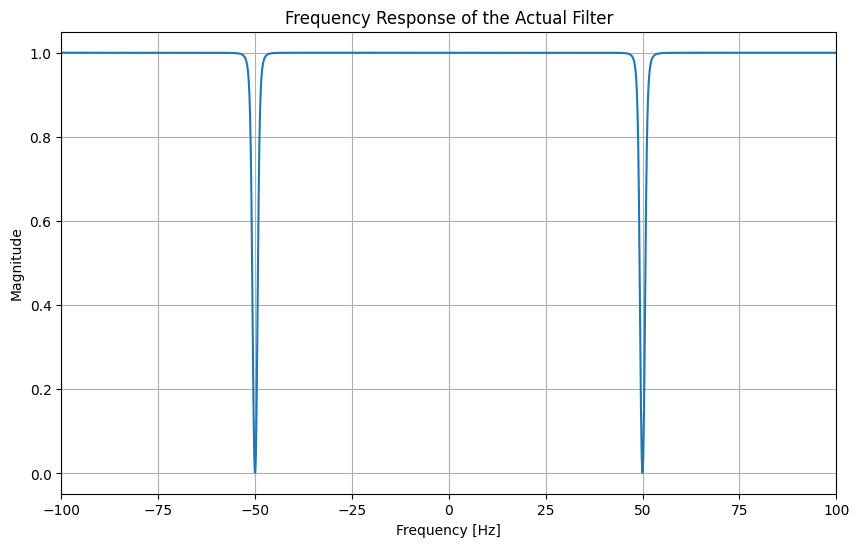

In [73]:
# Designing the filter
f1 = 49
f2 = 51
filter_type = 'bandstop' # EDIT HERE
b, a = signal.butter(2, [2*f1/Fs, 2*f2/Fs], filter_type , analog=False)
# Obtaining the frequency response of the filter
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)
h = np.append(np.flipud(h), h)
# Plotting the frequency response
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ww*Fs/(2*np.pi), abs(h) )
ax.set_title('Frequency Response of the Actual Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100,100)
ax.grid()


Task 5

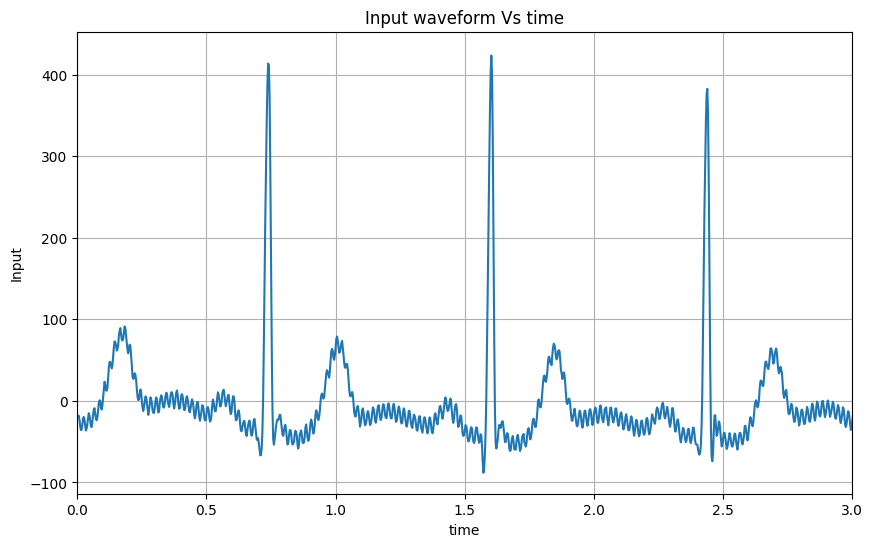

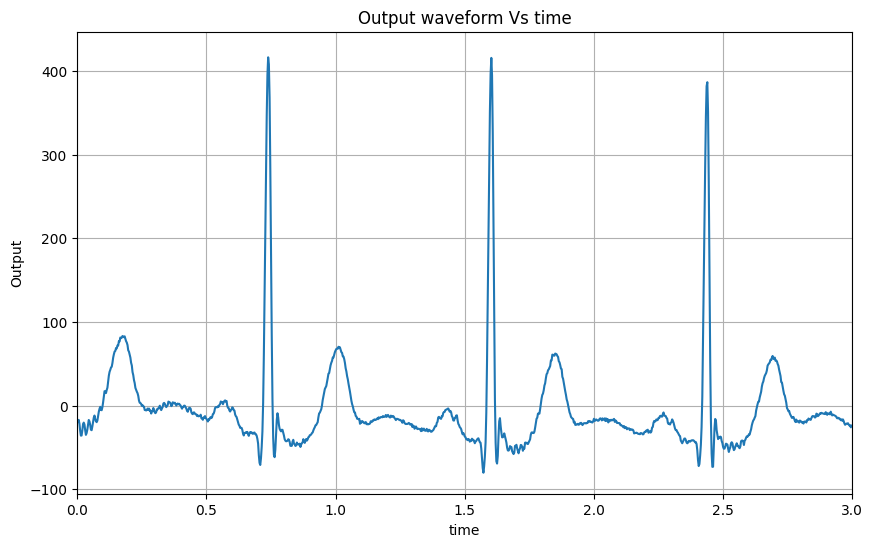

In [74]:
time= np.arange(T, duration+T, T)
# Filtering the ECG wavefoem
output = signal.lfilter(b, a, ecg)

# Plotting the the input and the output waveforms vs time
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(time,ecg)
ax.set_title('Input waveform Vs time')
ax.set_xlabel('time')
ax.set_ylabel('Input')
ax.set_xlim(0,3)
ax.grid()
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(time,output)
ax.set_title('Output waveform Vs time')
ax.set_xlabel('time')
ax.set_ylabel('Output')
ax.set_xlim(0,3)
ax.grid()

Task 6

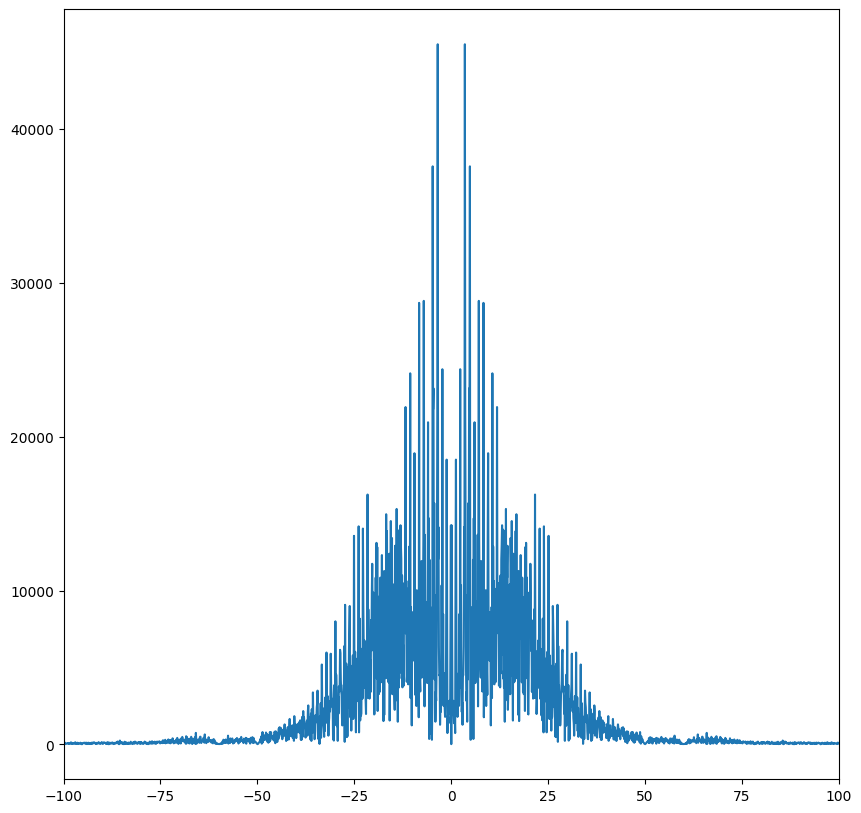

In [75]:
F = fftshift(fft(output))
fig, axes = plt.subplots(1,1, figsize=(10,10))
axes.plot(fr,abs(F))
axes.set_xlim(-100,100)
plt.show()